In [3]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib
import keras

df = pd.read_csv('weather.csv')

# print(df.head())

df = df[5::6]
# print(df.head())

# Handle dates
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
print(df[:26])


                               Date Time  p (mbar)  T (degC)  Tpot (K)  \
Date Time                                                                
2009-01-01 01:00:00  01.01.2009 01:00:00    996.50     -8.05    265.38   
2009-01-01 02:00:00  01.01.2009 02:00:00    996.62     -8.88    264.54   
2009-01-01 03:00:00  01.01.2009 03:00:00    996.84     -8.81    264.59   
2009-01-01 04:00:00  01.01.2009 04:00:00    996.99     -9.05    264.34   
2009-01-01 05:00:00  01.01.2009 05:00:00    997.46     -9.63    263.72   
2009-01-01 06:00:00  01.01.2009 06:00:00    997.71     -9.67    263.66   
2009-01-01 07:00:00  01.01.2009 07:00:00    998.33     -9.17    264.12   
2009-01-01 08:00:00  01.01.2009 08:00:00    999.17     -8.10    265.12   
2009-01-01 09:00:00  01.01.2009 09:00:00    999.69     -7.66    265.52   
2009-01-01 10:00:00  01.01.2009 10:00:00   1000.27     -7.04    266.10   
2009-01-01 11:00:00  01.01.2009 11:00:00   1000.87     -7.41    265.68   
2009-01-01 12:00:00  01.01.2009 12:00:

<Axes: xlabel='Date Time'>

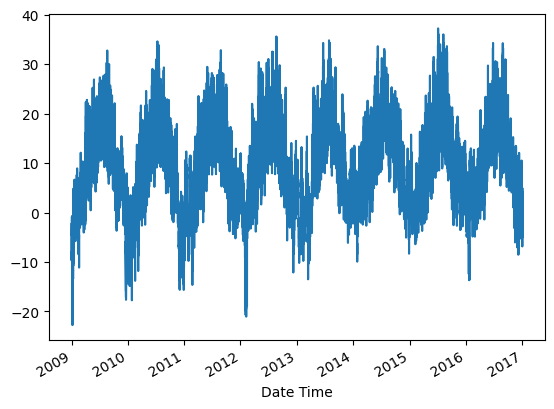

In [4]:
temp = df['T (degC)']
temp.plot()

In [5]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)


In [6]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, window_size=WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [7]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
cp = ModelCheckpoint('model1/.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [10]:
model1.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 137.3476 - root_mean_squared_error: 11.6972 - val_loss: 18.3631 - val_root_mean_squared_error: 4.2852
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 39.9469 - root_mean_squared_error: 6.2886 - val_loss: 2.3061 - val_root_mean_squared_error: 1.5186
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 8.1176 - root_mean_squared_error: 2.8357 - val_loss: 0.7140 - val_root_mean_squared_error: 0.8450
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2.2615 - root_mean_squared_error: 1.4998 - val_loss: 0.5425 - val_root_mean_squared_error: 0.7366
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.0460 - root_mean_squared_error: 1.0223 - val_loss: 0.4976 - val_root_mean_squared_error: 0.7054
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7892 - root_mean_squared_error: 0.8881 - val_loss: 0.4971 - val_root_mean_squared_error: 0.7050
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━

In [11]:
# Load the model we saved earlier
from tensorflow.keras.models import load_model
model1 = load_model('model1/.keras')

In [12]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train})
train_results

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


,Train Predictions,Actuals
0,-9.820451,-9.67
1,-9.683250,-9.17
2,-8.792196,-8.10
3,-7.259950,-7.66
4,-7.087624,-7.04
...,...,...
59995,6.269300,6.07
59996,7.107222,9.88
59997,12.610383,13.53
59998,15.864436,15.43


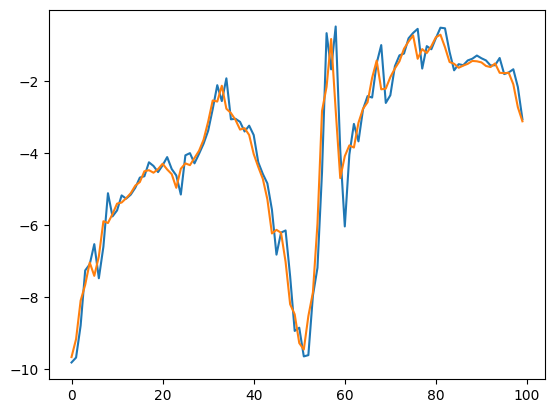

In [13]:

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [14]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Val Predictions,Actuals
0,15.580624,14.02
1,13.353554,13.67
2,13.047427,12.27
3,11.532307,11.19
4,10.458062,10.85
...,...,...
4995,17.406393,18.27
4996,17.428848,17.85
4997,17.193651,16.65
4998,15.899045,15.85


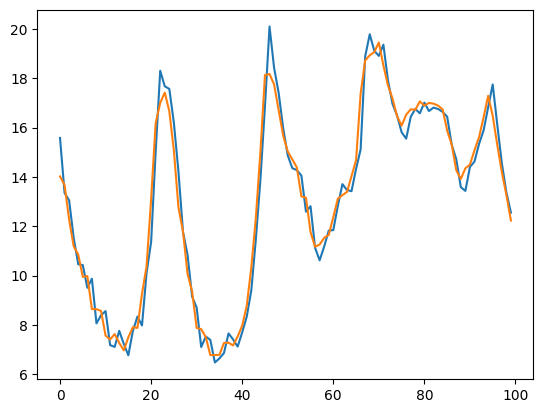

In [15]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [16]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Val Predictions': test_predictions, 'Actuals': y_test})
test_results

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Val Predictions,Actuals
0,14.411210,13.99
1,13.279010,13.46
2,12.897010,12.93
3,12.507782,12.43
4,12.072664,12.17
...,...,...
5081,-1.139153,-0.98
5082,-1.438223,-1.40
5083,-1.560145,-2.75
5084,-3.184736,-2.89


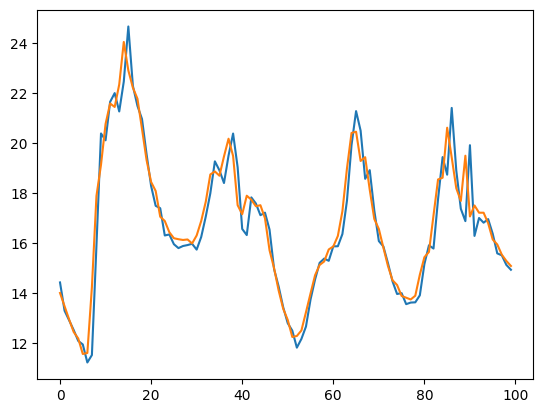

In [17]:
plt.plot(test_results['Val Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(      Predictions  Actuals
 0       15.580624    14.02
 1       13.353554    13.67
 2       13.047427    12.27
 3       11.532307    11.19
 4       10.458062    10.85
 ...           ...      ...
 4995    17.406393    18.27
 4996    17.428848    17.85
 4997    17.193651    16.65
 4998    15.899045    15.85
 4999    15.085835    15.09
 
 [5000 rows x 2 columns],
 0.4870083078407537)

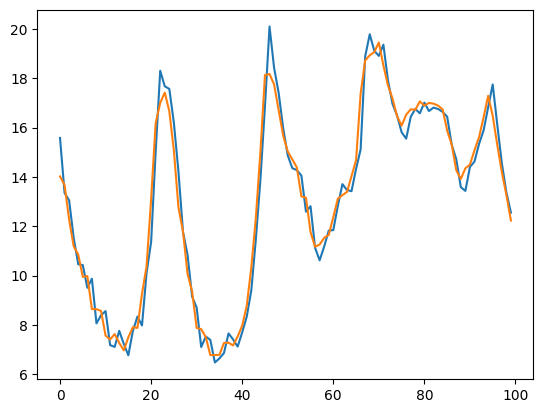

In [18]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals': y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(y, predictions)

plot_predictions1(model1, X_val, y_val)

In [21]:
# 
temp_df = pd.DataFrame({'Temperature' : temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp) # Date
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [23]:
day = 60 * 60 * 24
year = day * 365.2425 # Seconds in a year

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi) / day)
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi) / day)
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi) / year)
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi) / year)
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [24]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [25]:
def df_to_X_y2(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [26]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [27]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:], y2[60000:]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (10085, 6, 5), (10085,), (5085, 6, 5), (5085,))

In [28]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = ( (X[:, :, 0] - temp_training_mean) / temp_training_std )
    return X

In [29]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)


In [30]:
model2 = Sequential()
model2.add(InputLayer((6, 5)))
model2.add(LSTM(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,449 (72.07 KB)

 Trainable params: 18,449 (72.07 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
cp2 = ModelCheckpoint('model2/model2.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [35]:
model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 73.1194 - root_mean_squared_error: 8.2881 - val_loss: 2.2115 - val_root_mean_squared_error: 1.4871
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.2076 - root_mean_squared_error: 1.4789 - val_loss: 0.6683 - val_root_mean_squared_error: 0.8175
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.8271 - root_mean_squared_error: 0.9090 - val_loss: 0.5027 - val_root_mean_squared_error: 0.7090
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6002 - root_mean_squared_error: 0.7746 - val_loss: 0.4707 - val_root_mean_squared_error: 0.6861
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5418 - root_mean_squared_error: 0.7360 - val_loss: 0.4557 - val_root_mean_squared_error: 0.6750
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5249 - root_mean_squared_error: 0.7244 - val_loss: 0.4374 - val_root_mean_squared_error: 0.6614
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(      Predictions  Actuals
 0       13.192564    13.46
 1       12.836342    12.93
 2       12.383526    12.43
 3       12.028895    12.17
 4       12.229523    11.55
 ...           ...      ...
 5080    -1.101061    -0.98
 5081    -1.621463    -1.40
 5082    -1.843318    -2.75
 5083    -3.052426    -2.89
 5084    -3.181513    -3.93
 
 [5085 rows x 2 columns],
 0.4642624345304565)

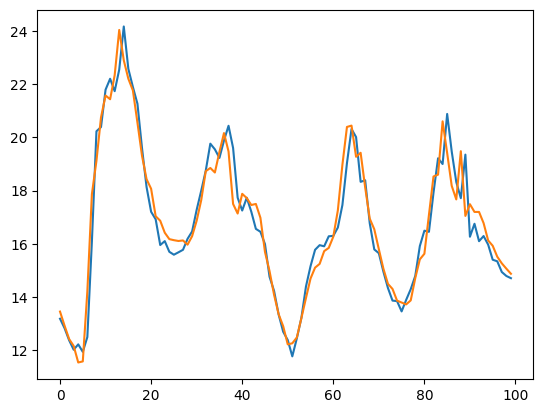

In [36]:
plot_predictions1(model2, X2_test, y2_test)

In [70]:
# Multivariate (Adding pressure)
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [71]:
def df_to_X_y3(df, window_size=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)

In [72]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape


((70084, 7, 6), (70084, 2))

In [73]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [74]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [75]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)


array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [76]:
model3 = Sequential()
model3.add(InputLayer((7, 6)))
model3.add(LSTM(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(2, 'linear'))

model3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 64)             │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,714 (73.10 KB)

 Trainable params: 18,714 (73.10 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
cp3 = ModelCheckpoint('model3/model3.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [78]:
model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.3442 - root_mean_squared_error: 0.5584 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1821
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0285 - root_mean_squared_error: 0.1686 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1302
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0871
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0748
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0066 - root_mean_squared_error: 0.0810 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0678
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0054 - root_mean_squared_error: 0.0735 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [79]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals , temp_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data={
        'Temperature Predictions' : temp_preds,
        'Temperature Actuals' : temp_actuals,
        'Pressure Predictions' : p_preds,
        'Pressure Actuals' : p_actuals
    })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df[start:end]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.403446,0.412451,-0.796454,-0.793439
1,0.358579,0.353683,-0.788523,-0.763123
2,0.321331,0.323123,-0.756995,-0.721893
3,0.329733,0.250251,-0.705086,-0.652773
4,0.294641,0.254952,-0.618100,-0.652773
...,...,...,...,...
95,0.698588,0.716869,-0.414789,-0.416310
96,0.652894,0.687485,-0.420421,-0.399333
97,0.633717,0.663978,-0.406302,-0.399333
98,0.640798,0.641646,-0.399077,-0.400546


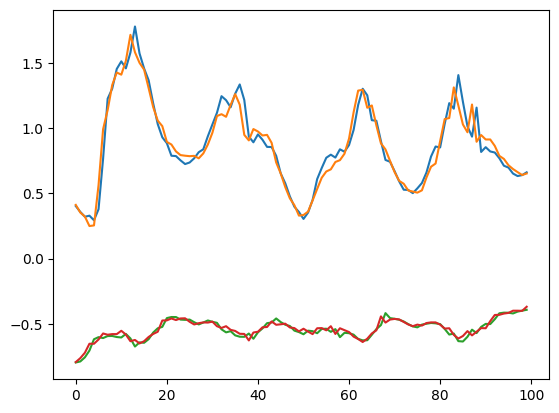

In [80]:
plot_predictions2(model3, X3_test, y3_test)